In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [6]:
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']
df = df.drop(columns=cols , axis =1)
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log,LoanAmountLog
0,1,0,0,0,0,360.0,1.0,2,1,8.674026,4.986426
1,1,1,1,0,0,360.0,1.0,0,0,8.714568,4.852030
2,1,1,0,0,1,360.0,1.0,2,1,8.006368,4.189655
3,1,1,0,1,0,360.0,1.0,2,1,8.505323,4.787492
4,1,0,0,0,0,360.0,1.0,2,1,8.699515,4.948760


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x, y , test_size = 0.1 , random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
names = []
scores = []

In [9]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
from sklearn import metrics
print("The accuracy of Random Forest is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('RandomForestClassifier')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of Random Forest is :  79.03225806451613 %


In [10]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train , y_train)
y_pred = NB.predict(X_test)
from sklearn import metrics
print("The accuracy of Naive Bayes is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('GaussianNB')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of Naive Bayes is :  85.48387096774194 %


In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
from sklearn import metrics
print("The accuracy of Logistic Regression is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('LogisticRegression')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of Logistic Regression is :  88.70967741935483 %


In [12]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
from sklearn import metrics
print("The accuracy of Decision Tree Classifier is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('DecisionTreeClassifier')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of Decision Tree Classifier is :  79.03225806451613 %


In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train , y_train)
y_pred = KNN.predict(X_test)
from sklearn import metrics
print("The accuracy of K Nearest Neighbors is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('KNeighborsClassifier')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of K Nearest Neighbors is :  80.64516129032258 %


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train , y_train)
y_pred = gbc.predict(X_test)
from sklearn import metrics
print("The accuracy of K GradientBoostingClassifier is : " ,metrics.accuracy_score(y_pred , y_test)*100,'%')
names.append('GradientBoostingClassifier')
scores.append(metrics.accuracy_score(y_pred , y_test)*100)

The accuracy of K GradientBoostingClassifier is :  80.64516129032258 %


In [15]:
print(names)
print(scores)

['RandomForestClassifier', 'GaussianNB', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GradientBoostingClassifier']
[79.03225806451613, 85.48387096774194, 88.70967741935483, 79.03225806451613, 80.64516129032258, 80.64516129032258]


In [16]:
dt=pd.DataFrame()
dt['Name']=names
dt['Score']=scores
dt

,Name,Score
0,RandomForestClassifier,79.032258
1,GaussianNB,85.483871
2,LogisticRegression,88.709677
3,DecisionTreeClassifier,79.032258
4,KNeighborsClassifier,80.645161
5,GradientBoostingClassifier,80.645161


In [17]:
cm = sns.light_palette("green", as_cmap=True)
s = dt.style.background_gradient(cmap=cm)
s

,Name,Score
0,RandomForestClassifier,79.032258
1,GaussianNB,85.483871
2,LogisticRegression,88.709677
3,DecisionTreeClassifier,79.032258
4,KNeighborsClassifier,80.645161
5,GradientBoostingClassifier,80.645161


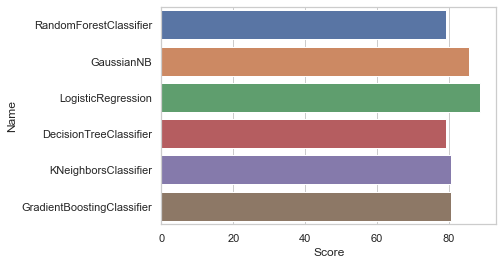

In [18]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Name", x="Score", data=dt)

In [19]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [20]:
r_probs = [0 for _ in range(len(y_test))]
RF_probs = RF.predict_proba(X_test)
NB_probs = NB.predict_proba(X_test)
LR_probs = LR.predict_proba(X_test)
DTC_probs = DTC.predict_proba(X_test)
KNN_probs = KNN.predict_proba(X_test)
gbc_probs = gbc.predict_proba(X_test)

In [21]:
RF_probs = RF_probs[:, 1]
NB_probs = NB_probs[:, 1]
LR_probs = LR_probs[:, 1]
DTC_probs = DTC_probs[:, 1]
KNN_probs = KNN_probs[:, 1]
gbc_probs = gbc_probs[:, 1]

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
DTC_auc = roc_auc_score(y_test, DTC_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
gbc_auc = roc_auc_score(y_test, gbc_probs)

In [23]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (RF_auc))
print('Naive Bayes: AUROC = %.3f' % (NB_auc))
print('Logistic Regression : AUROC = %.3f' % (LR_auc))
print('Decision Tree : AUROC = %.3f' % (DTC_auc))
print('KNeighborsClassifier : AUROC = %.3f' % (KNN_auc))
print('GradientBoosting :AUROC = %.3f' % (gbc_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.716
Naive Bayes: AUROC = 0.760
Logistic Regression : AUROC = 0.772
Decision Tree : AUROC = 0.748
KNeighborsClassifier : AUROC = 0.720
GradientBoosting :AUROC = 0.749


In [24]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
DTC_fpr, DTC_tpr, _ = roc_curve(y_test, DTC_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probs)

In [25]:
import matplotlib.pyplot as plt

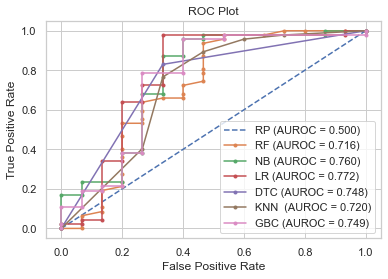

In [26]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='RP (AUROC = %0.3f)' % r_auc)
plt.plot(RF_fpr, RF_tpr, marker='.', label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(NB_fpr, NB_tpr, marker='.', label='NB (AUROC = %0.3f)' % NB_auc)
plt.plot(LR_fpr, LR_tpr, marker='.', label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(DTC_fpr, DTC_tpr, marker='.', label='DTC (AUROC = %0.3f)' % DTC_auc)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN  (AUROC = %0.3f)' % KNN_auc)
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='GBC (AUROC = %0.3f)' % gbc_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()